In [30]:
#import importlib
import claims_over_time_plot
import get_data
import numpy as np
import pandas as pa
#\from isoweek import Week
import os
#importlib.reload(get_data)
#importlib.reload(bayes_model_summary)


In [31]:
from get_data import get_data,get_data_withcovid
import pandas as pd
from claims_over_time_plot import summarize
# from bayes_estimate import estimate_regression
import gc

In [32]:
import os
def path_creator(path):
    """
    Creates a path of any depth.
    Note the path is created relative to code folder
    Do not start path with '../' - the function will handle that
    Example: 'Model Free/Chicago'
    returns nothing
    """
    
    paths = path.split('/')
    print(paths)
    new_path ='../{}/'
    for p in paths:
        if not os.path.exists(new_path.format(p)):
            new_path = new_path.format(p)
            print(new_path)
            try:
                os.makedirs(new_path.format(p))
            except:
                print(new_path.format(p)," : Already Exists")
            new_path = new_path+'/{}/'
        else:
            new_path = new_path.format(p)
            new_path = new_path+'/{}/'

In [33]:
def plot_data(filename):
    
    filename_parts = filename.split('/')
    drug_name = filename_parts[-2]
    clean_fname = filename_parts[-1].replace('.csv','') #+ "_" + filename_parts[-2]
    graphs_path = "Processed Data/state_week/model_free/" +drug_name + "/"  + '/Graphs'
    
    
    path_creator(graphs_path)
    path_creator(graphs_path+"_stdz")
    
    print(clean_fname +'\n')
    print('\n')
    suffix = clean_fname
    
    
    if "claim" in f:
        title = "\n Actual Prescription Claims (Indexed) for IVM and Covid Cases"
        y_label = "Indexed Claim Count (IVM)"
    elif 'first' in f:
        title ="\n Actual and Predicted First Person Count (IVM) (Indexed) for HCQ and Covid Cases"
        y_label = "Indexed First Person Count (IVM)"    
    elif 'person' in f:
        title ="\n Actual and Predicted Person Count (IVM) (Indexed) for HCQ and Covid Cases"
        y_label = "Indexed Person Count (IVM)"    
    elif 'days' in f:
        title ="\n Actual and Predicted Prescription Total Days Supply(Indexed) for HCQ and Covid Cases"
        y_label = "Indexed Total Days Supply (HCQ)"   
       
    scale= True
    
    covid_label = "Weekly Covid Cases (in Millions)"
    
    #title.replace("_","")
    X_all,y_all,X_train, y_train,y_scaler,time_labels, covid_cases, skip = get_data_withcovid(f,scale=scale,remove={'trend', 'y','Unnamed: 0','pre_period','time_index','treat_post','year','week','trend', 'covid_cases','week_date'})
    #trace,model_preds,model,posterior_predictive,selected_init_method,cv_mape= estimate_regression(X_train, y_train, X_all, y_all,prior_type,model_type,relaxed=False, estimator=estimator, y_scaler=None)
    #print(covid_cases)
    #stop
    if skip:
        return {'inestimable': clean_fname}
    vlinepos=[y_train.shape[0],y_train.shape[0]+12]
    
    
    print(vlinepos)
    # covid_blue = pd.read_csv("Data_IB/Covid_national_blue.csv")
    #covid_cases=None
    summary= summarize(clean_fname, y_all, y_train,y_scaler, suffix,xname='Weeks',covid_cases=covid_cases ,opath='../'+graphs_path, time_labels=time_labels, vlinepos=vlinepos, title=title, y_label=y_label, covid_label=covid_label, national=True,transform=False, drug_name=drug_name)
    summary= summarize(clean_fname, y_all, y_train,y_scaler, suffix,xname='Weeks',covid_cases=covid_cases, opath='../'+graphs_path+"_stdz", time_labels=time_labels, vlinepos=vlinepos, title=title, y_label=y_label, covid_label=covid_label, national=True,transform=True, drug_name=drug_name)
    
    gc.collect()
    return {'estimable': clean_fname, "y_scaler" : y_scaler, }

In [34]:
import glob

In [35]:
#filenames = glob.glob("../Data_IB/data_preprocessed_full/states/TotalClaims/*.csv")

filenames = glob.glob("../Processed Data/state_week/synth_data/ivermectin/actual_claim_count*")

In [36]:
policies = ['SPU', 'SPR', 'UMPU', 'UMPR', 'LMP', 'WP']

In [37]:
filenames =[f for f in filenames if "placebo" not in f and "trump" not in f and "all" in f and "covid" in f and "filtered" not in f and "orig" not in f and 'SPU' not in f and 'SPR' not in f and 'UMPU' not in f and 'UMPR' not in f and 'LMP' not in f and 'WP' not in f]

In [38]:
filenames

['../Processed Data/state_week/synth_data/ivermectin/actual_claim_count_all_covid.csv']

In [39]:
len(filenames)

1

In [40]:
import glob
from itertools import repeat
from random import shuffle
# filenames = glob.glob('../Processed Data/modeling_data/rotate_gh/**/RT*.csv', recursive=True)

# filenames = [x for x in filenames if 'long' in x or 'hand' in x]
#filenames = ["Data_IB/data_preprocessed_full/national/FirstTime/" + file for file in files]
results=[]
suffix = 'ivm'

In [41]:
from itertools import product

def get_kwargs(filenames, vlinepos=[]):
    process_this= zip(filenames, repeat(vlinepos) )
    return process_this

In [42]:
filenames[0].split('/')

['..',
 'Processed Data',
 'state_week',
 'synth_data',
 'ivermectin',
 'actual_claim_count_all_covid.csv']

In [43]:
filenames[0]

'../Processed Data/state_week/synth_data/ivermectin/actual_claim_count_all_covid.csv'

../Processed Data/state_week/synth_data/ivermectin/actual_claim_count_all_covid.csv
['Processed Data', 'state_week', 'model_free', 'ivermectin', '', 'Graphs']
['Processed Data', 'state_week', 'model_free', 'ivermectin', '', 'Graphs_stdz']
actual_claim_count_all_covid



[64, 76]
y pos 74130.87520259319
64
100
105
108
112
129
131
137
[0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 155]
FILEPATH ../Processed Data/state_week/model_free/ivermectin//Graphs/actual_claim_count_all_covid.png


/root/gdrive_folder/GoodRx/Ivermectin JASA Share/Code Model Free Ivm/claims_over_time_plot.py:84: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(time[33:], y_all[33:], lw =1.5, color=colors[2], label = 'Actual IVM Claims', linestyle="-", marker='')
/root/gdrive_folder/GoodRx/Ivermectin JASA Share/Code Model Free Ivm/claims_over_time_plot.py:187: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
/root/gdrive_folder/GoodRx/Ivermectin JASA Share/Code Model Free Ivm/claims_over_time_plot.py:147: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax2.plot_date(time[33:], covid_cases[33:], color = colors[1], lw =1, linestyle='--',marker='', label="Weekly C

y pos 229.25052919392684
64
100
105
108
112
129
131
137
[0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 155]
FILEPATH ../Processed Data/state_week/model_free/ivermectin//Graphs_stdz/actual_claim_count_all_covid.png


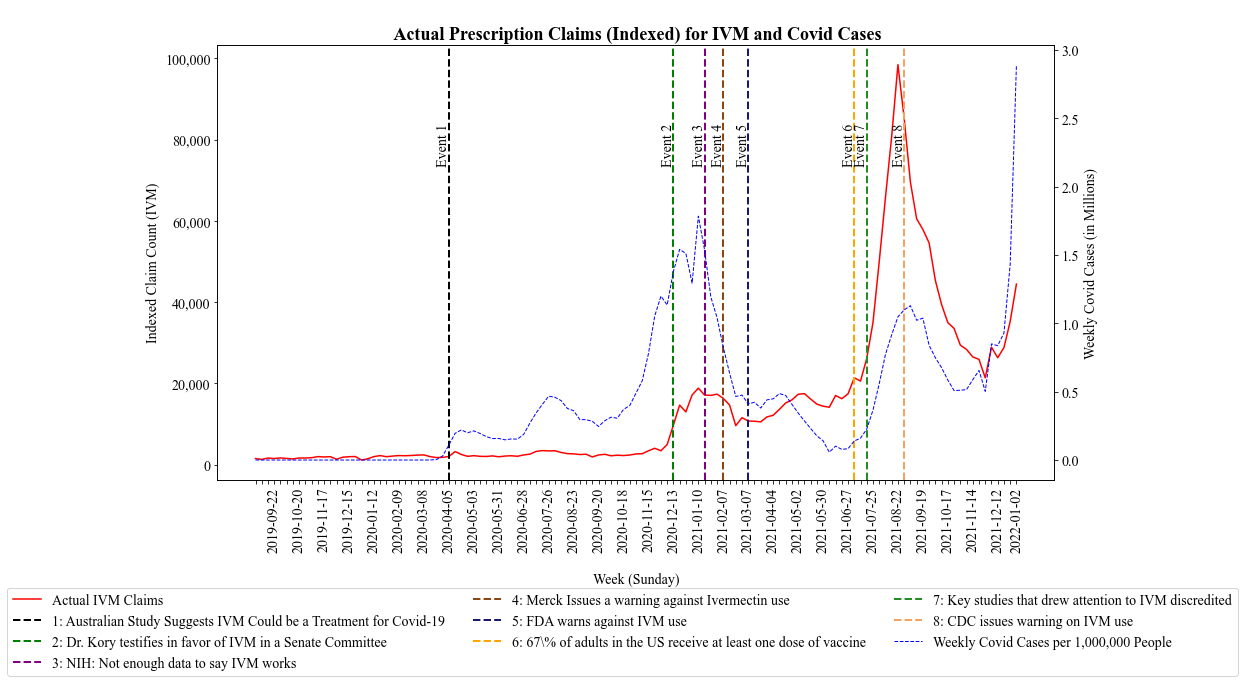

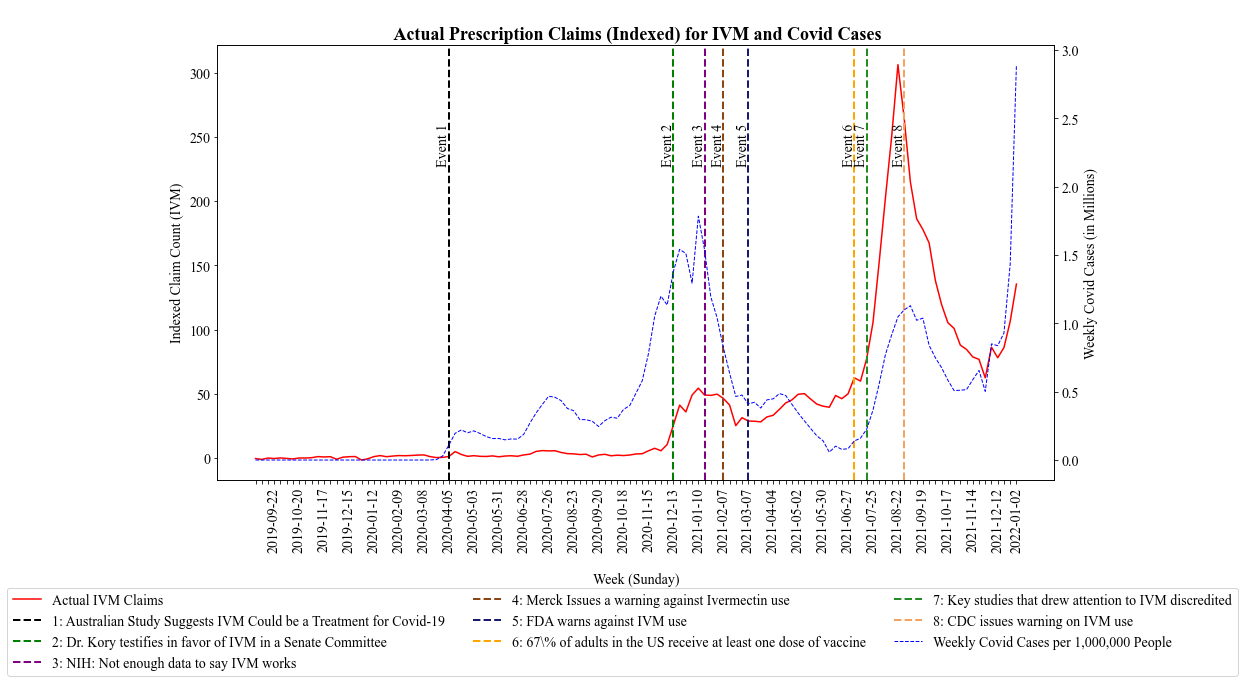

In [44]:
for f in filenames:
    kwards = get_kwargs(f)
    print(f)
    plot_data(f)